## Part 3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_pickle('Sales_data_update.pickle')

In [7]:
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60


### Get the value counts of Invoice


In [8]:
df['Invoice'].value_counts()

537434    1350
538071    1302
537638    1202
537237    1194
536876    1186
          ... 
511296       1
511299       1
511305       1
511324       1
509741       1
Name: Invoice, Length: 40082, dtype: int64

### Get the value counts of Customer ID

In [9]:
df['Customer ID'].value_counts()

17841.0    12890
14911.0    11245
12748.0     7228
14606.0     6566
14096.0     5111
           ...  
15284.0        1
13864.0        1
15693.0        1
16417.0        1
13290.0        1
Name: Customer ID, Length: 5878, dtype: int64

### Get the value counts of Country

In [10]:
df['Country'].value_counts()

United Kingdom          958502
EIRE                     17349
Germany                  16694
France                   13940
Netherlands               5088
Spain                     3719
Switzerland               3136
Belgium                   3068
Portugal                  2562
Australia                 1812
Channel Islands           1569
Italy                     1468
Norway                    1436
Sweden                    1338
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Unspecified                752
Greece                     657
Poland                     512
Japan                      485
United Arab Emirates       467
USA                        409
Israel                     369
Hong Kong                  358
Singapore                  339
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        167
Bahrain 

### Get the value counts of Description

In [11]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5778
REGENCY CAKESTAND 3 TIER              4061
JUMBO BAG RED RETROSPOT               3391
ASSORTED COLOUR BIRD ORNAMENT         2938
PARTY BUNTING                         2740
                                      ... 
LUNCH BAG PINK POLKADOTS                 1
PARTY PIZZA DISH RED+WHITE SPOT          1
11 PC CERAMIC TEA SET POLKADOT           1
MUG PINK AND PURPLE ARABIC DESIGN        1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 5399, dtype: int64

### Get the sum of the revenue by country

In [12]:
df.groupby('Country').sum().sort_values('Revenue', ascending = False)['Revenue']

Country
United Kingdom          1.787135e+07
EIRE                    6.644318e+05
Netherlands             5.542323e+05
Germany                 4.312625e+05
France                  3.569446e+05
Australia               1.699681e+05
Spain                   1.091785e+05
Switzerland             1.010113e+05
Sweden                  9.190372e+04
Denmark                 6.986219e+04
Belgium                 6.575342e+04
Norway                  6.010962e+04
Portugal                5.801665e+04
Japan                   4.713839e+04
Channel Islands         4.499676e+04
Italy                   3.255042e+04
Finland                 2.992554e+04
Singapore               2.531706e+04
Cyprus                  2.498013e+04
Hong Kong               2.389432e+04
Austria                 2.361301e+04
Greece                  1.909619e+04
Israel                  1.133466e+04
United Arab Emirates    1.109763e+04
Unspecified             1.093601e+04
Poland                  1.090245e+04
USA                     8.3668

### Resample the DataFrame by month and obtain sum of Quantity and Revenue

When we plotted the time series for Quantity in Part II, it presented a few challenges:

1. the time stamps are repeated, i.e. multiple purchases are happening
2. the range in purchase quantity is large
3. the timescale is too granular

As such, we should take the median of either each hour/day's purchase to plot instead. 

In [14]:
df_monthly = df.resample('M').sum()[['Quantity', 'Revenue']]
df_monthly

,Quantity,Revenue
InvoiceDate,,
2009-12-31,426981,825685.760
2010-01-31,391525,652708.502
2010-02-28,382782,553713.306
2010-03-31,527401,833570.131
2010-04-30,368198,681528.992
2010-05-31,397206,659858.860
2010-06-30,408636,752270.140
2010-07-31,338920,650712.940
2010-08-31,473420,697274.910


### Plot Quantity over the months

Text(0, 0.5, 'Quantity')

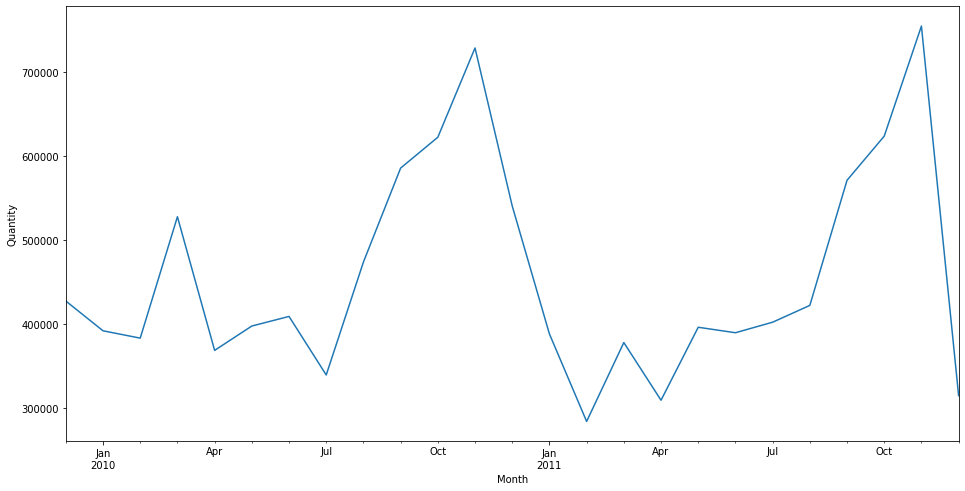

In [15]:
plt.figure(figsize=(16,8))
df_monthly['Quantity'].plot()
plt.xlabel('Month')
plt.ylabel('Quantity')

### Plot Revenue over the months

Text(0, 0.5, 'Revenue')

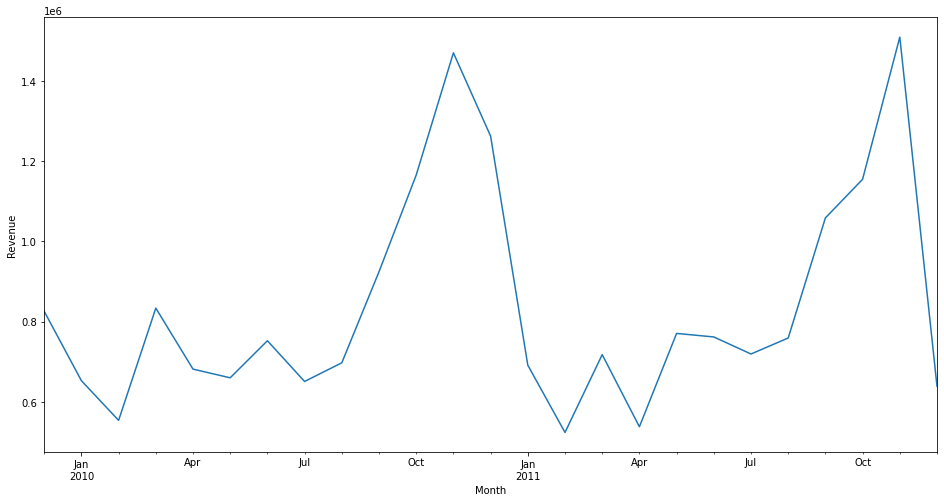

In [16]:
plt.figure(figsize=(16,8))
df_monthly['Revenue'].plot()
plt.xlabel('Month')
plt.ylabel('Revenue')

## Text Analysis

I will use a wordcloud to visualize the most common words

In [17]:
import wordcloud

### Get a list of containing all of the items sold so far

In [18]:
arr = df['Description'].unique()

### Join the items in the list into a huge string

In [19]:
word_list = list(map(lambda x: x.lower(), arr))
words = ' '.join(word_list)

### Create wordcloud

In [20]:
stopwords = wordcloud.STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

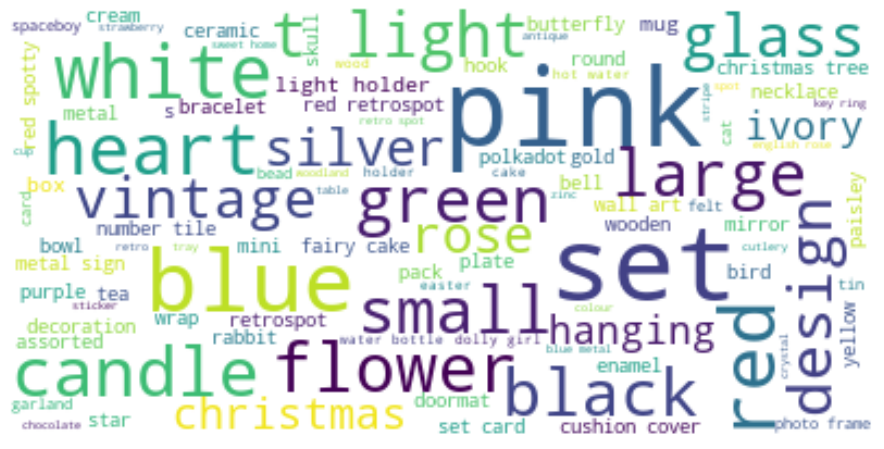

In [21]:
cloud = wordcloud.WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color="white").generate(words)
plt.figure(figsize = (16,8))
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')